# Lab 4 Ordinary Differential Equations, Part 1

In [1]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%run ./ODESolvers.py

### Introduction: The basics

Consider the given ODE 
\begin{equation}
    \begin{cases}
    y'(t) = y-\frac{1}{2}e^{\frac{t}{2}}\cdot\sin(5t)+5e^{\frac{t}{2}}\cdot\cos(5t)\\
    y(0)=0
    \end{cases}
\end{equation}
on the interval $[0,\pi]$. 

In [3]:
def rhsODEs(t, y):
    return y - 0.5*np.exp(0.5*t)*np.sin(5*t)+5*np.exp(0.5*t)*np.cos(5*t)

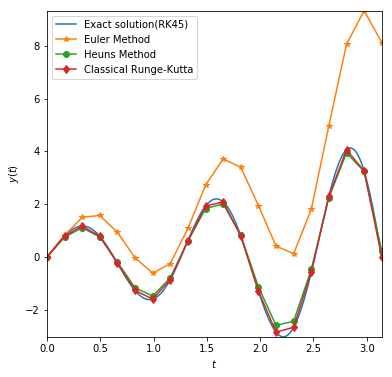

In [4]:
# initial condition
y0 = [0]
N = 20

# Time steps
t_span = (0, np.pi)
t_eval = np.linspace(t_span[0], t_span[1], 1000)

# Solve for the ODE with R-K method
sol_ex = solve_ivp(rhsODEs, t_span, y0, method='RK45', t_eval=t_eval)
sol_fe = EulerForward(rhsODEs, t_span, y0, N)
sol_he = Heun(rhsODEs, t_span, y0, N)
t_evalRK = np.linspace(t_span[0], t_span[1], N)
sol_rk = solve_ivp(rhsODEs, t_span, y0, method='RK45', t_eval=t_evalRK)

# plot
fig, ax = plt.subplots(1, figsize=(6, 6))
ax.plot(sol_ex.t,sol_ex.y.T )
ax.plot(sol_fe[0], sol_fe[1],'-*' )
ax.plot(sol_he[0], sol_he[1],'-o' )
ax.plot(sol_rk.t,sol_rk.y.T, '-d')

ax.autoscale(enable=True, axis='both', tight=True)
ax.set_ylabel(r'$y(t)$')
ax.set_xlabel(r'$t$')
ax.legend(['Exact solution(RK45)','Euler Method', 'Heuns Method', 'Classical Runge-Kutta'])

### Application: Predator and prey

Simulating the interaction between predator and prey, described by the Lotka-Volterra ordinary differential equation.
\begin{equation}
    \begin{cases}
    y_1'=\alpha y_1-\beta y_1y_2\\
    y_2'=\delta y_1y_2-\gamma y_2, \, t>0\\
    y_1(0)=\hat{y_1}\\
    y_2(0)=\hat{y_2}\\
    \end{cases}
\end{equation}

In [5]:
def PredPreyODE(t,y,alpha, beta, delta, gamma):
    return [alpha*y[0]-beta*y[0]*y[1], 
            delta*y[0]*y[1]-gamma*y[1]]

The ODEs are solved by `scipy.integrate.solve_ivp` which is a solver for initial value problem. See https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html

In [6]:
# Time interval for the simulation
t0 = 0
t1 = 40
t_span = (t0, t1)
t_eval = np.linspace(t_span[0], t_span[1], 10000)

# Initial conditions, e.g. number of predator and prey at time zero
pred0 = 40
prey0 = 80
y0 = [prey0, pred0]

# Set parameters alfa, beta, delta, gamma
alpha = 0.8;   # Reproduction rate of prey
beta = 0.02;  # Mortality rate of predator per prey
delta = 0.02; # Reproduction rate of predator per prey
gamma = 0.4;  # Mortality rate of predator

# Solve for Van der Pohls equation
sol = solve_ivp(lambda t,y: PredPreyODE(t, y, alpha, beta, delta, gamma),
                t_span, y0, method='RK45', t_eval=t_eval)

Text(0.5,0,'time')

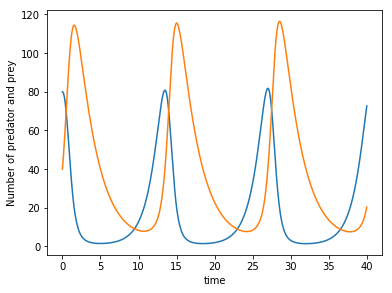

In [7]:
# plot
fig, ax = plt.subplots(1, figsize=(6, 4.5))
# plot y1 and y2 together
ax.plot(sol.t.T,sol.y.T )
ax.set_ylabel('Number of predator and prey')
ax.set_xlabel('time')